# Imports and setup

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
import numpy as np
from helpers.helpers import edge_identification_accuracy 
from scipy.interpolate import interp1d


graph_sizes = {
    "acm": (3025, 13128),
    "polblogs": (1222, 16714),
    "flickr": (7575, 239738),
    "cora": (2485, 5096),
}


# RAE over iterations

     run    attack_type  graph1_prop  common_prop  iter_num  absent  present  \
6      0  probabilistic          0.1            0         0  659362     5950   
10     0  probabilistic          0.1            0         1  660021     5978   
13     0  probabilistic          0.1            0         2  660061     5994   
16     0  probabilistic          0.1            0         3  660140     6010   
19     0  probabilistic          0.1            0         4  660191     6026   
26     0  probabilistic          0.1            0         5  673796     6625   
30     0  probabilistic          0.1            0         6  674963     6741   
35     0  probabilistic          0.1            0         7  680486     6924   
40     0  probabilistic          0.1            0         8  682135     7055   
43     0  probabilistic          0.1            0         9  682167     7071   
46     0  probabilistic          0.1            0        10  682192     7087   
51     0  probabilistic          0.1    

/var/folders/zf/mm8hyjbs5kdg2gxhblkfwn0c0000gn/T/ipykernel_87703/1876596704.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["rae_plus"] = (results["FP"] + results["FN"]) / graph_sizes[dataset_name][1]
/var/folders/zf/mm8hyjbs5kdg2gxhblkfwn0c0000gn/T/ipykernel_87703/1876596704.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["rae_minus"] = ( results["FP"] + results["FN"]  + results["unknown"] ) / graph_sizes[dataset_name][1]
/var/folders/zf/mm8hyjbs5kdg2gxhblkfwn0c0000gn/T/ipykernel_

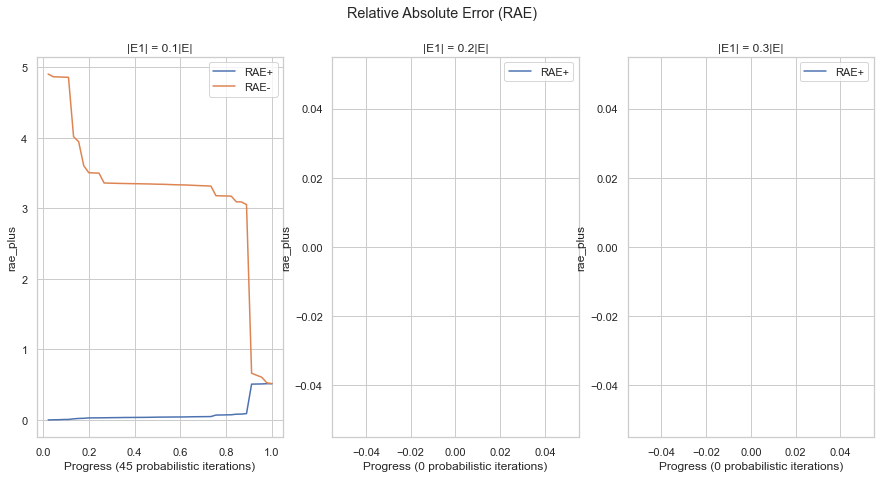

In [28]:

dataset_names = ['polblogs']
graph1_props = [0.1, 0.2, 0.3]
common_props = [0]
sns.set(font_scale=1.2)
sns.set_theme(style="whitegrid")
link_prediction_method = "G1"
x_axis = np.linspace(0, 1, 11, endpoint=True)
fig, axes = plt.subplots(1, 3, figsize=(15, 7))

for dataset_name in dataset_names:
   raw_results = pd.read_csv(f"logs_hybrid/{dataset_name}_preferential_attachment_{link_prediction_method}.csv", header=None)
   raw_results.columns = ['run', 'attack_type','graph1_prop', 'common_prop', 'iter_num', 'absent', 'present', 'unknown', 'TP', 'FP', 'TN', 'FN', 'time']
   for j, (graph1_prop, common_prop) in enumerate(product(graph1_props, common_props)):   

      ax = axes[j]
      
      results = raw_results[(raw_results['graph1_prop'] == graph1_prop) & (raw_results['common_prop'] == common_prop) & (raw_results['attack_type'] == 'probabilistic') & (raw_results['run'] == 0)]
      number_probabilistics = len(results["iter_num"])

      print(results)

      results["rae_plus"] = (results["FP"] + results["FN"]) / graph_sizes[dataset_name][1]

      results["rae_minus"] = ( results["FP"] + results["FN"]  + results["unknown"] ) / graph_sizes[dataset_name][1]

      if results["rae_minus"].min() == 0:
         
         sns.lineplot(x=x_axis, y=0, label=f'RAE+', ax=ax)
         sns.lineplot(x=x_axis, y=0, label=f'RAE-', ax=ax)

      else:
         results["progress"] = (results["iter_num"] +1) / number_probabilistics
         sns.lineplot(x='progress', y='rae_plus', data=results, label=f'RAE+', ax=ax)
         sns.lineplot(x=results["progress"], y=results['rae_minus'], label=f'RAE-', ax=ax)
      
      ax.set_title(f'|E1| = {graph1_prop}|E|')
      ax.set_xlabel(f'Progress ({number_probabilistics} probabilistic iterations)')
       

fig.suptitle('Relative Absolute Error (RAE)')      
plt.show()
      

# RAE max 

[0.5147182003111165, nan]


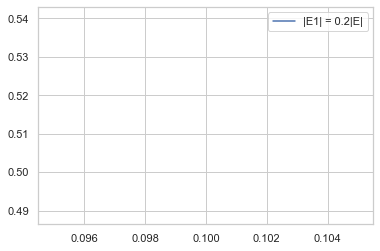

In [19]:

for i, dataset_name in enumerate(dataset_names):
   raes = []
   for j, (graph1_prop, common_prop) in enumerate(product(graph1_props, common_props)):   

      results = pd.read_csv(f"logs_hybrid/{dataset_name}_preferential_attachment_{link_prediction_method}.csv", header=None)
      results.columns = ['run', 'attack_type','graph1_prop', 'common_prop', 'iter_num', 'absent', 'present', 'unknown', 'TP', 'FP', 'TN', 'FN', 'time']
      results = results[(results['graph1_prop'] == graph1_prop) & (results['common_prop'] == common_prop) & (results['attack_type'] == 'probabilistic') & (results['run'] == 0)]
      number_probabilistics = len(results["iter_num"])

      results["rae_plus"] = (results["FP"] + results["FN"]) / graph_sizes[dataset_name][1]

      results["rae_minus"] = ( results["FP"] + results["FN"]  + results["unknown"] ) / graph_sizes[dataset_name][1]


      raes.append(results["rae_minus"].min())


   print(raes)
   sns.lineplot(x=graph1_props, y=raes, label=f'|E1| = {graph1_prop}|E|')
   ax.set_title(f'{dataset_name}')
   ax.set_xlabel(f'|E1|/|E|')
   ax.set_ylabel(f'Max RAE-')
       

fig.suptitle('Relative Absolute Error (RAE)')      
plt.show()
      

In [ ]:






sns.set_style("whitegrid")

graph_sizes = {
    'cora': 5096,
    'polblogs': 16714,
    'flickr': 239738,
    'acm': 13128
}

graph1_props = np.linspace(0, 0.9, 9)
colors = ["#1a80bb", "#ff7f0e", "#2ca02c", "#d62728"]
common_props = [0]

dataset_names = ['cora', 'polblogs', 'flickr', 'acm']

# Prepare data for Seaborn plotting
data_for_plot = pd.DataFrame(columns=['Dataset', 'Attacker Knowledge (p)', 'Reconstruction Gap'])
data_list = []  # Use a list to collect data


for dataset_name in dataset_names:
    dataset_data = pd.DataFrame(columns=['x', 'y'])
    dataset_list = []
    raw_results = pd.read_csv(f"logs/{dataset_name}_acc.csv", header=None)
    raw_results.columns = ['run', 'graph1_prop', 'common_prop', 'acc', 'frobenius_norm', 'rae']

    for graph1_prop, common_prop in product(graph1_props, common_props):
        current_results = raw_results[(raw_results['graph1_prop'] == graph1_prop) & (raw_results['common_prop'] == common_prop)]
        for i in range(len(current_results)):
            error_rate = 1 - (current_results['frobenius_norm'].iloc[i] ** 2) / (2*graph_sizes[dataset_name])
            dataset_list.append({'x': graph1_prop, 'y': error_rate})
    
            # data_list.append({'Dataset': dataset_name.upper(), 'Attacker Knowledge (p)': graph1_prop, 'Reconstruction Gap': error_rate})
    color = colors[dataset_names.index(dataset_name)]
    dataset_data = pd.DataFrame(dataset_list)
    sns.lineplot(x='x', y='y', data=dataset_data, marker='o', color=color, label=f'{dataset_name.upper()}')
    plt.xlabel("Attacker Knowledge (p)")
    plt.ylabel("Reconstruction efficiency")

plt.xlim(0)  # Set x-axis limits
plt.ylim(0)  # Set y-axis limits
plt.show()



/var/folders/zf/mm8hyjbs5kdg2gxhblkfwn0c0000gn/T/ipykernel_76876/3197225944.py:47: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0)  # Set y-axis limits


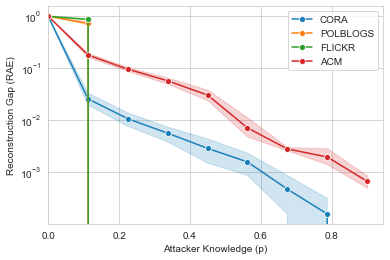

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
import numpy as np
sns.set_style("whitegrid")

graph_sizes = {
    'cora': 5096,
    'polblogs': 16714,
    'flickr': 239738,
    'acm': 13128
}

graph1_props = np.linspace(0, 0.9, 9)
colors = ["#1a80bb", "#ff7f0e", "#2ca02c", "#d62728"]
common_props = [0]

dataset_names = ['cora', 'polblogs', 'flickr', 'acm']

# Prepare data for Seaborn plotting
data_for_plot = pd.DataFrame(columns=['Dataset', 'Attacker Knowledge (p)', 'Reconstruction Gap'])
data_list = []  # Use a list to collect data


for dataset_name in dataset_names:
    dataset_data = pd.DataFrame(columns=['x', 'y'])
    dataset_list = []
    raw_results = pd.read_csv(f"logs/{dataset_name}_acc.csv", header=None)
    raw_results.columns = ['run', 'graph1_prop', 'common_prop', 'acc', 'frobenius_norm', 'rae']

    for graph1_prop, common_prop in product(graph1_props, common_props):
        current_results = raw_results[(raw_results['graph1_prop'] == graph1_prop) & (raw_results['common_prop'] == common_prop)]
        for i in range(len(current_results)):
            error_rate = (current_results['frobenius_norm'].iloc[i] ** 2) / (2*graph_sizes[dataset_name])
            dataset_list.append({'x': graph1_prop, 'y': error_rate})
    
            # data_list.append({'Dataset': dataset_name.upper(), 'Attacker Knowledge (p)': graph1_prop, 'Reconstruction Gap': error_rate})
    color = colors[dataset_names.index(dataset_name)]
    dataset_data = pd.DataFrame(dataset_list)
    sns.lineplot(x='x', y='y', data=dataset_data, marker='o', color=color, label=f'{dataset_name.upper()}')
    plt.xlabel("Attacker Knowledge (p)")
    plt.ylabel("Reconstruction Gap (RAE)")
    plt.yscale("log")

plt.xlim(0)  # Set x-axis limits
plt.ylim(0)  # Set y-axis limits
plt.show()



## 1.2 Convergence speed

/var/folders/zf/mm8hyjbs5kdg2gxhblkfwn0c0000gn/T/ipykernel_76876/1750861648.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_results["edge_accuracy"] = current_results["present"] / graph_sizes[dataset_name]
/var/folders/zf/mm8hyjbs5kdg2gxhblkfwn0c0000gn/T/ipykernel_76876/1750861648.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_results["edge_accuracy"] = current_results["present"] / graph_sizes[dataset_name]
/var/folders/zf/mm8hyjbs5kdg2gxhblkfwn0c0000gn/T/ipykernel_76876/175086164

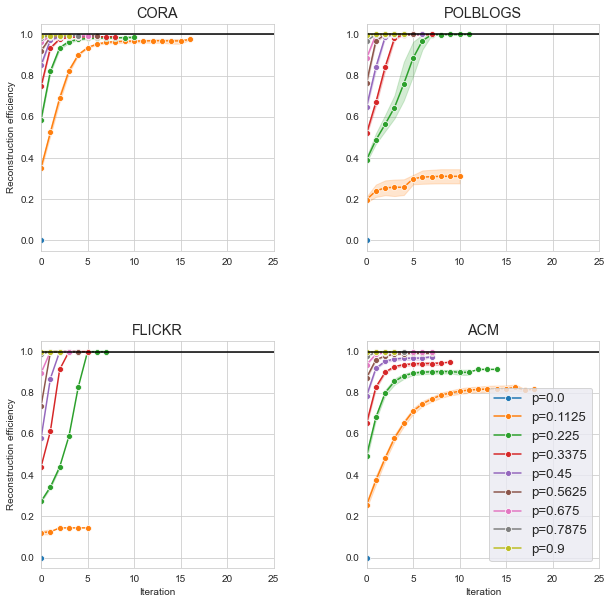

In [ ]:
graph1_props = np.linspace(0, 0.9, 9)
common_props = [0]
f, axes = plt.subplots(2, 2, figsize=(10, 10))

dataset_names = ['cora', 'polblogs', 'flickr', 'acm']
colors = ["#1a80bb", "#ff7f0e", "#2ca02c", "#d62728"]

for i, dataset_name in enumerate(dataset_names):
    row = i // 2
    raw_results = pd.read_csv(f"logs/{dataset_name}.csv", header=None)
    raw_results.columns = ['run', 'graph1_prop', 'common_prop', 'iter_num', 'absent', 'present', 'unknown', 'time']

    data_list = []
    data_for_plot = pd.DataFrame(columns=['Dataset', 'Iteration', 'Unknowns'])
    
    for j, (graph1_prop, common_prop) in enumerate(product(graph1_props, common_props)):
        col = i % 2
        ax = axes[row][col]
        current_results = raw_results[(raw_results['graph1_prop'] == graph1_prop) & (raw_results['common_prop'] == common_prop)]
        current_results["edge_accuracy"] = current_results["present"] / graph_sizes[dataset_name]
        # color = colors[graph1_props.index(graph1_prop)]
        sns.set(font_scale=1.2)
        sns.lineplot(x='iter_num', y='edge_accuracy', data=current_results, marker='o', label=f'p={graph1_prop}' if row == 1 and col == 1 else "", ax=ax)
        ax.set_xlim(0, 25)  # Set x-axis limits
        if row == 1:
            ax.set_xlabel('Iteration')
        else:
            ax.set_xlabel('')

        if col == 0:
            ax.set_ylabel('Reconstruction efficiency')
        else:
            ax.set_ylabel('')
        ax.set_title(f'{dataset_name.upper()}')

    ax.axline((0, 1), (25,  1), color="black")
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    
plt.subplots_adjust(hspace=0.4)  # Adjust spacing between subplots if needed
plt.subplots_adjust(wspace=0.4)  # Adjust spacing between subplots if needed
# axes[1][1].legend(title='Attacker Knowledge (p)', loc='upper right')
plt.legend()
plt.show()


# 2. Probabilistic attack


In [ ]:

dataset_names = ['cora', 'polblogs', 'flickr', 'acm']
graph1_props = [0.1, 0.25, 0.5, 0.75]
common_props = [0]
s
edge_accuracies = {}

for dataset_name in dataset_names:
    ground_truth = Graph.from_npy(f"datasets/{dataset_name}.adj.npy")
    for graph1_prop, common_prop in product(graph1_props, common_props):
        deterministic_reconstruction = Graph.from_npy(f"rec_deterministic/{dataset_name}_{graph1_prop}_{common_prop}.npy")
        deterministic_edge_accuracy = edge_identification_accuracy(deterministic_reconstruction, ground_truth)
        edge_accuracies[(dataset_name, graph1_prop, common_prop)] = deterministic_edge_accuracy


KeyboardInterrupt: 

cora 0.1 0
cora 0.25 0
cora 0.5 0
cora 0.75 0
polblogs 0.1 0
polblogs 0.25 0
polblogs 0.5 0
polblogs 0.75 0
flickr 0.1 0
flickr 0.25 0
flickr 0.5 0
flickr 0.75 0
acm 0.1 0
acm 0.25 0
acm 0.5 0
acm 0.75 0


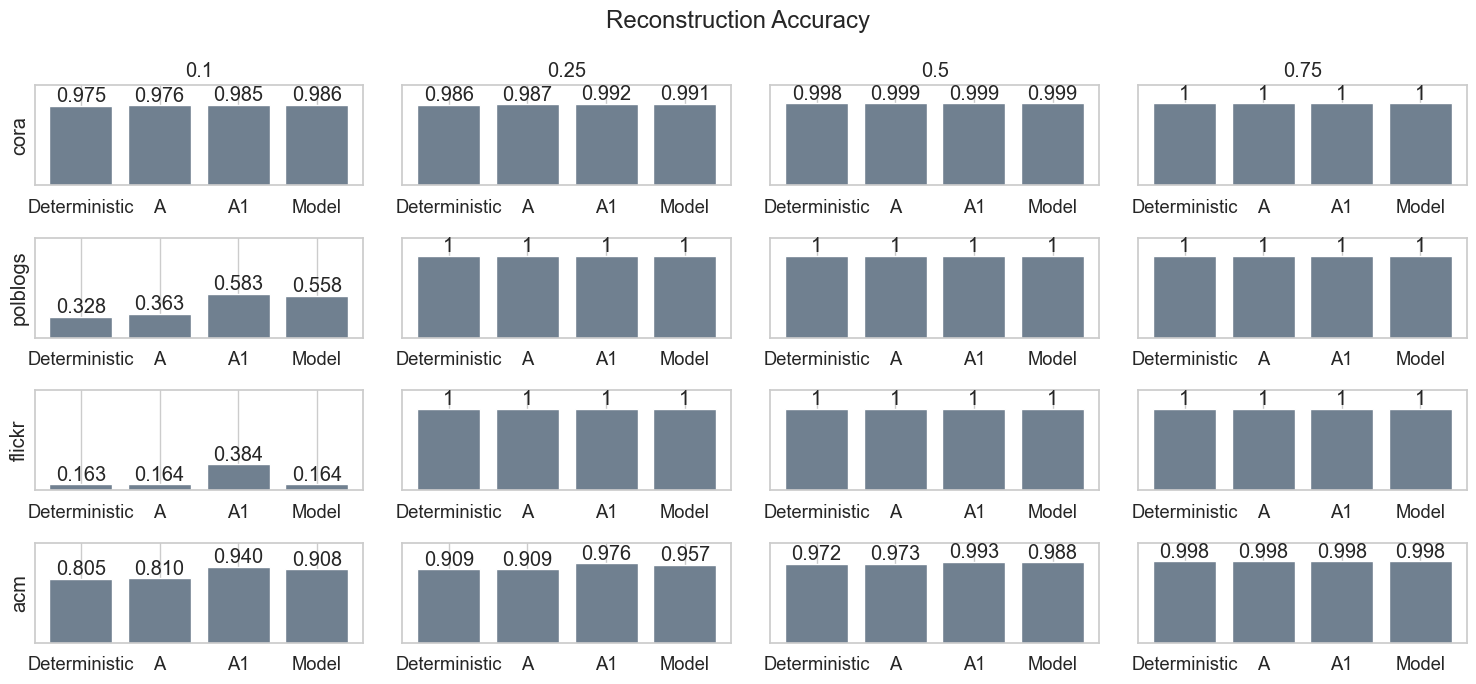

In [ ]:
# print(edge_accuracies)

plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")

for i, dataset_name in enumerate(dataset_names):
    ground_truth = Graph.from_npy(f"datasets/{dataset_name}.adj.npy")
    for j, (graph1_prop, common_prop) in enumerate(product(graph1_props, common_props)):
        # print(dataset_name, graph1_prop, common_prop)
        deterministic_edge_accuracy = edge_accuracies[(dataset_name, graph1_prop, common_prop)]

        results = pd.read_csv(f"logs_probabilistic/{dataset_name}.csv", header=None)
        results.columns = ['graph1_prop', 'common_prop', 'method', 'accuracy', 'distance', 'rad', 'edge_accuracy']
        result_A = results[(results['graph1_prop'] == graph1_prop) & (results['common_prop'] == common_prop) & (results['method'] == 'A')]
        result_common_neighbors = results[(results['graph1_prop'] == graph1_prop) & (results['common_prop'] == common_prop) & (results['method'] == 'common_neighbors')]
        result_model = results[(results['graph1_prop'] == graph1_prop) & (results['common_prop'] == common_prop) & (results['method'] == 'model')]

        plt.subplot(len(dataset_names), len(graph1_props), i*len(graph1_props) + j + 1)
        plt.bar("Deterministic", deterministic_edge_accuracy, label='Deterministic', color='#708090')
        plt.bar("A", result_A["edge_accuracy"], label='A', color='#708090')
        plt.bar("A1", result_common_neighbors["edge_accuracy"], label='Common Neighbors', color='#708090')
        plt.bar("Model", result_model["edge_accuracy"], label='Custom Model' , color='#708090')
        # write value of bar on top of it
        for index, value in enumerate([deterministic_edge_accuracy, result_A["edge_accuracy"].item(), result_common_neighbors["edge_accuracy"].item(), result_model["edge_accuracy"].item()]):
            f_value = f'{value:.3f}' if value !=1 else 1
            plt.text(index, value, f_value, ha='center', va='bottom')

        if j == 0:
            plt.ylabel(dataset_name)
        if i == 0:
            plt.title(f'{graph1_prop}')
        plt.ylim(0.1, 1.2)
        plt.yticks([])

# plt.legend()
plt.suptitle('Reconstruction Accuracy')
plt.tight_layout()
plt.show()


# Hybrid attack

## RAE

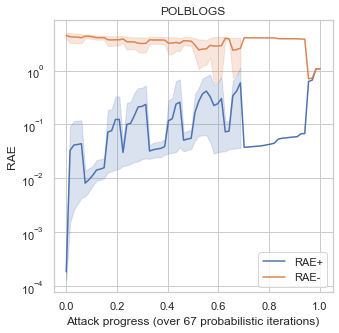

0.016613920869240018

In [5]:
import pandas as pd

results = pd.read_csv(f"logs_erdos/polblogs.csv", header=None)

results.columns = ['run', 'method', 'graph1_prop', 'common_prop', 'accuracy', 'distance', 'rad', 'edge_accuracy']

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,copy,0.0,0,0,1222,0,746031,0,0,1222,0,0.000000
1,0,degree_hub,0.0,0,0,1222,52,745979,52,0,1222,0,0.000000
2,0,deterministic,0.0,0,0,33519,3130,710604,3130,0,33519,0,13.082263
3,0,deterministic,0.0,0,1,470643,3191,273419,3191,0,470643,0,15.261438
4,0,deterministic,0.0,0,2,477797,3191,266265,3191,0,477797,0,16.887628
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,deterministic,0.9,0,3,730539,16714,0,16714,0,730539,0,27.302285
80,0,copy,1.0,0,0,1222,16714,729317,16714,0,1222,0,0.000000
81,0,degree_hub,1.0,0,0,1222,16714,729317,16714,0,1222,0,0.000000
82,0,deterministic,1.0,0,0,730539,16714,0,16714,0,730539,0,27.375361
